# Laboratorium 4
## Singular Value Decomposition
Natalia Brzozowska

#### Zadanie 1. Wyszukiwarka

###### 1. Ze strony internetowej https://ebible.org/find/details.php?id=eng-web&all=1 pobrałam 1402 rozdziały Biblii w formacie txt.

###### 2. Okresl słownik słów kluczowych

In [474]:
import os
import io
import re
import nltk
import numpy as np
nltk.download('punkt')
import string
import math
from sklearn.preprocessing import normalize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natalia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [475]:
def make_dictionary():
    files = os.listdir('Bible_in_chapters/')
    dictionary={}
    for file in files:
        f = io.open('Bible_in_chapters/'+file,encoding="utf8")
        wholeFile = f.read()
        f.close()
        sentences=wholeFile.split('\n')
        
        for i in range(len(sentences)):
            sentences[i] = sentences[i].lower()
            sentences[i] = re.sub(r'[^\w\s]','',sentences[i])
            sentences[i] = re.sub('[0-9]','',sentences[i])

            words=nltk.word_tokenize(sentences[i])
            for word in words:
                if word in dictionary.keys():
                    dictionary[word]+=1
                else:
                    dictionary[word]=1
    
    
    return dictionary

In [476]:
dictionary = make_dictionary()

Określiłam słownik termów robiąc unię wszytskich słow z dokumentów. W każdym słowie wielkość liter jest zmniejszana, usuwane są znaki interpunkcyjne oraz liczby. Dodatkowo, z ciekawości, zliczyłam występowanie poszczególnych słów. Słownik realizuję poprzez strukturę danych 'słownik', ponieważ wydawało mi się to lepszym rozwiązaniem (również bardziej czytelnym dla mnie). Część słownika oraz ilość wystąpień danych słów są przedstawione poniżej.

In [477]:
def show_words(n,diction):
    listTuples = sorted(diction.items() ,  key=lambda x: x[1], reverse=True)

    print(len(diction))
    
    
    for elem in listTuples :
        print(elem[0] , " ::" , elem[1] )
        n-=1
        if n==0:
            break

Dwadzieścia najczęściej występujących słów w tej wersji Biblli.

In [478]:
show_words(20,dictionary)

15450
the  :: 67841
and  :: 38623
of  :: 38235
to  :: 26192
you  :: 16815
in  :: 15760
he  :: 12846
will  :: 11413
for  :: 11347
a  :: 10954
that  :: 10108
his  :: 9987
i  :: 9824
they  :: 8818
is  :: 8629
your  :: 8475
with  :: 8055
who  :: 8006
him  :: 7762
be  :: 7257


###### 3. Dla kazdego dokumentu j wyznacz wektor cech bag-of-words dj zawierajacy czestosci wystepowania poszczególnych słów (termów) w tekscie.

In [479]:
def make_vector(file):
    words_freq={}
    for word in dictionary.keys():
        words_freq[word]=0
    f = io.open(file,encoding="utf8")
    wholeFile = f.read()
    f.close()
    sentences=wholeFile.split('\n')
    
    for i in range(len(sentences)):
        sentences[i] = sentences[i].lower()
        sentences[i] = re.sub(r'[^\w\s]','',sentences[i])
        sentences[i] = re.sub('[0-9]','',sentences[i])
        words=nltk.word_tokenize(sentences[i])
        for word in words:
            words_freq[word]+=1
    return words_freq

Napisałam funkcję tworzącą słownik zawierający zliczoną ilość słów z 'głównego słownika' w danym dokumencie.
Tak jak dla 'głównego słownika', w każdym dokumencie wielkość liter jest zmniejszana, usuwane są znaki interpunkcyjne oraz liczby.

###### 4. Zbuduj rzadką macierz wektorów cech term-by-document matrix w której wektory cech ułozone sa kolumnowo.

In [480]:
def make_matrix():
    files = os.listdir('Bible_in_chapters/')
    matrix = []
    vec={}
    for file in files:
        name = 'Bible_in_chapters/'+file
        vec=make_vector(name)
        matrix.append(vec)
    return matrix

In [504]:
term_by_doc = make_matrix()

Tworzę macierz A, zawierającą wektory częstotliwości słów dla każdego dokumentu. Macierz zawiera słowniki, które traktuję jako wektory częstości.

In [482]:
print("wiersze: ",len(term_by_doc))
print("kolumny: ",len(term_by_doc[0]))

wiersze:  1402
kolumny:  15450


###### 5. Przetwórz wstepnie otrzymany zbiór danych mnozac elementy bag-of-words przez inverse document frequency.

Dwadzieścia najczęstszyc słów w 50 dokumencie, przed użyciem inverse-document-frequency:

In [483]:
show_words(20,term_by_doc[50])

15450
the  :: 39
and  :: 30
of  :: 18
them  :: 11
they  :: 11
to  :: 9
in  :: 6
with  :: 6
all  :: 6
egypt  :: 6
midwives  :: 6
you  :: 5
israel  :: 5
said  :: 4
a  :: 4
his  :: 4
but  :: 4
out  :: 4
shall  :: 4
more  :: 4


In [505]:
def word_in_docs(w):
    count=0
    for p in range(len(term_by_doc)): 
        arr=term_by_doc[p]
        if arr.get(w)!=0:
            count+=1
    return count

    
def idf():
    keys=dictionary.keys()
    N=int(len(term_by_doc))
    for el in keys:
        nw=int(word_in_docs(el))
        wsk=float(math.log(N/nw))
        for p in range(len(term_by_doc)):
            line=term_by_doc[p]
            line[el]=line.get(el)*wsk

In [506]:
ask_me("dont be afraid",6)

eng-web_046_SIR_05_read.txt
eng-web_046_SIR_08_read.txt
eng-web_046_SIR_04_read.txt
eng-web_046_SIR_09_read.txt
eng-web_046_SIR_07_read.txt
eng-web_046_SIR_32_read.txt


In [507]:
ask_me_better("dont be afraid",6)

eng-web_020_PSA_070_read.txt
eng-web_046_SIR_05_read.txt
eng-web_019_JOB_25_read.txt
eng-web_020_PSA_128_read.txt
eng-web_020_PSA_112_read.txt
eng-web_046_SIR_08_read.txt


In [508]:
idf()

Dwadzieścia najczęstszyc słów w 50 dokumencie, po użyciu inverse-document-frequency:

In [488]:
show_words(20,term_by_doc[50])

15450
midwives  :: 43.473930405567216
ruthlessly  :: 14.491310135189071
hebrew  :: 12.463837842708658
midwife  :: 12.294085557852851
egypt  :: 10.441941189973036
boys  :: 10.096860980516633
multiplied  :: 9.66091013057816
pharaoh  :: 9.504352871066448
service  :: 8.744765181924613
joseph  :: 8.705548937222554
alive  :: 7.921454644819333
pithom  :: 7.2456550675945355
raamses  :: 7.2456550675945355
shiphrah  :: 7.2456550675945355
stool  :: 7.2456550675945355
women  :: 6.626107395542718
feared  :: 6.588822698026216
mosis  :: 6.55250788703459
birth  :: 6.205040682406005
grew  :: 6.173543968469727


Tworzę funkcje służące do mnożenia elementów macierzy A przez inverse document frequency. Funkcja word_in_docs() służy do zliczenia dokumentów w których dane słowo występuje. Przed wykonaniem funkcji i po jej wykonaniu wyświetliłam zawartość jednego z wektorów w macierzy A term-by-document, żeby sprawdzić zmiany, które ewidentnie zaszły. Można zauważyć, że znaczenie słowa 'the' zmalało i w tej linii wynosi teraz 'the  :: 0.05567452765622762', a przed wykonaniem funkcji idf() wynosiło 'the  :: 39'. Słowo 'the' jest najczęściej pojawiającym się słowem w tych dokumentach.

W celu wykonania porównań w punkcie 9 przed funkcją idf() zostały wykonane zapytania 'ask_me' opisane później.

###### 6. Napisz program pozwalajacy na wprowadzenie zapytania (w postaci sekwencji słów) przekształcanego nastepnie do reprezentacji wektorowej q (bag-of-words). Program ma zwrócic k dokumentów najbardziej zblizonych do podanego zapytania q.

In [489]:
def ask_me(string,k):
    new_vec={}
    for word in dictionary.keys():
        new_vec[word]=0
    
    string = string.lower()
    string = re.sub(r'[^\w\s]','',string)
    string = re.sub('[0-9]','',string)

    words=nltk.word_tokenize(string)
    for word in words:
            new_vec[word]+=1
    
    q=np.array(list(new_vec.values()), dtype=np.float64)
    qnorm=np.linalg.norm(q)
    arr=[]
    for i in range(len(term_by_doc)):
        d_vec=np.array(list(term_by_doc[i].values()), dtype=np.float64)
        dnorm=np.linalg.norm(d_vec)
        if dnorm==0:
            tup=((q.T @ d_vec),i)
        else:
            tup=(np.matmul(q.T, d_vec)/(qnorm*dnorm),i)
        arr.append(tup)
    
    arr.sort(key = lambda x:x[0] ,reverse=True)  
   

    files = os.listdir('Bible_in_chapters/')
    for i in range(k):
        print(files[arr[i][1]])
        
    

In [490]:
ask_me("dont be afraid",6)

eng-web_046_SIR_07_read.txt
eng-web_046_SIR_08_read.txt
eng-web_046_SIR_05_read.txt
eng-web_046_SIR_04_read.txt
eng-web_021_PRO_03_read.txt
eng-web_046_SIR_09_read.txt


Program tworzy wektor z podanej sekwencji słów, następnie oblicza korelację utworzonego wektora z każdym wektorem należącym do dokumentów i na tej podstawie porównuje na ile dokument pasuje do podanej sekwencji.

######  7. Zastosuj normalizacje wektorów cech dj i wektora q, tak aby miały one długosc 1.

In [491]:
def ask_me_better(string,k):
    new_vec={}
    for word in dictionary.keys():
        new_vec[word]=0
    
    string = string.lower()
    string = re.sub(r'[^\w\s]','',string)
    string = re.sub('[0-9]','',string)

    words=nltk.word_tokenize(string)
    for word in words:
            new_vec[word]+=1
    
    q=np.array(list(new_vec.values()), dtype=np.float64)
    qnorm=np.linalg.norm(q)
    q=q/qnorm
    arr=[]
    
    for i in range(len(term_by_doc)):
        d_vec=np.array(list(term_by_doc[i].values()), dtype=np.float64)
        dnorm=np.linalg.norm(d_vec)
        if dnorm==0:
            tup=((q.T @ d_vec),i)
        else:
            d_vec=d_vec/dnorm
            tup=((q.T @ d_vec)/(qnorm*dnorm),i)
        arr.append(tup)
   
    
    arr.sort(key = lambda x:x[0] ,reverse=True)  
   

    files = os.listdir('Bible_in_chapters/')
    for i in range(k):
        print(files[arr[i][1]])





In [492]:
ask_me_better("dont be afraid",6)

eng-web_046_SIR_05_read.txt
eng-web_046_SIR_08_read.txt
eng-web_027_EZK_02_read.txt
eng-web_046_SIR_07_read.txt
eng-web_020_PSA_112_read.txt
eng-web_024_ISA_12_read.txt


Zmodyfikowałam obliczanie korealcji między wektorami normalizując je. Można zauważyć rozbieżność w dokumentach wybranych przez tą funkcję, a funkcję z poprzedniego puktu.

###### 8. W celu usuniecia szumu z macierzy A zastosuj SVD i low rank approximation

In [493]:
def make_real_matrix(dicti):
    matrix=[]
    for row in dicti:
        matrix.append(list(row.values()))
    return matrix

def make_dicti_again(matrix, dicti):
    for i in range(len(dicti)):
        j=0;
        for el in dicti[i]:
            dicti[i][el]=matrix[i][j]
            j+=1

def low_rank_appr(k,arr):
    matrix=make_real_matrix(arr)
    U,D,V=np.linalg.svd(matrix)
    prod= np.matmul((U[:, :k]), np.diag(D[:k]))
    prod2=np.matmul(prod,(V[:k, :]))
    product=prod2.astype('uint8')
    
    return make_dicti_again(product, arr)

In [494]:
low_rank_appr(1000,term_by_doc)

In [495]:
ask_me("dont be afraid",6)

eng-web_046_SIR_05_read.txt
eng-web_046_SIR_08_read.txt
eng-web_046_SIR_04_read.txt
eng-web_021_PRO_03_read.txt
eng-web_046_SIR_09_read.txt
eng-web_027_EZK_02_read.txt


In [496]:
ask_me_better("dont be afraid",6)

eng-web_046_SIR_05_read.txt
eng-web_020_PSA_028_read.txt
eng-web_027_EZK_02_read.txt
eng-web_022_ECC_11_read.txt
eng-web_020_PSA_141_read.txt
eng-web_046_SIR_08_read.txt


In [510]:
term_by_doc = make_matrix()
idf()
low_rank_appr(20,term_by_doc)
ask_me_better("dont be afraid",6)

eng-web_045_WIS_15_read.txt
eng-web_046_SIR_31_read.txt
eng-web_089_JAS_01_read.txt
eng-web_019_JOB_13_read.txt
eng-web_021_PRO_28_read.txt
eng-web_045_WIS_02_read.txt


In [511]:
term_by_doc = make_matrix()
idf()
low_rank_appr(100,term_by_doc)
ask_me_better("dont be afraid",6)

eng-web_019_JOB_35_read.txt
eng-web_019_JOB_08_read.txt
eng-web_046_SIR_05_read.txt
eng-web_019_JOB_14_read.txt
eng-web_036_HAB_01_read.txt
eng-web_019_JOB_27_read.txt


In [512]:
term_by_doc = make_matrix()
idf()
low_rank_appr(500,term_by_doc)
ask_me_better("dont be afraid",6)

eng-web_020_PSA_070_read.txt
eng-web_046_SIR_05_read.txt
eng-web_020_PSA_004_read.txt
eng-web_046_SIR_32_read.txt
eng-web_046_SIR_08_read.txt
eng-web_022_ECC_11_read.txt


In [513]:
term_by_doc = make_matrix()
idf()
low_rank_appr(700,term_by_doc)
ask_me_better("dont be afraid",6)

eng-web_046_SIR_05_read.txt
eng-web_020_PSA_070_read.txt
eng-web_020_PSA_028_read.txt
eng-web_022_ECC_11_read.txt
eng-web_020_PSA_141_read.txt
eng-web_089_JAS_04_read.txt


In [514]:
term_by_doc = make_matrix()
idf()
low_rank_appr(1200,term_by_doc)
ask_me_better("dont be afraid",6)

eng-web_046_SIR_05_read.txt
eng-web_020_PSA_141_read.txt
eng-web_024_ISA_12_read.txt
eng-web_027_EZK_02_read.txt
eng-web_022_ECC_11_read.txt
eng-web_020_PSA_028_read.txt


 Zastosowałam low rank approximation, analogicznie jak w poprzednim laboratorium. Funkcja pomocnicza make_real_matrix() tworzy tablicę liczb z tablicy słowników, a funkcja make_dicti_again() działa w drugą stronę (tworzy tablicę słowników z tablicy liczb).

Wykonałam kilka zapytań dla różnych wartości k, które omówię w następnym punkcie.

###### 9. Porównanie działania

In [515]:
#Wystąpienia poszczególnych słów i zwrotów w niektórych dokumentach

# księga | dont | be | dont be | afraid | be afraid | dont be afraid
# SIR 05 | 15   | 8  | 3       | 0      |  0        | 0
# SIR 08 | 22   | 6  | 1       | 0      |  0        | 0
# SIR 04 | 22   | 12 | 5       | 0      |  0        | 0
# SIR 07 | 30   | 7  | 3       | 0      |  0        | 0
# SIR 09 | 15   | 10 | 1       | 0      |  0        | 0
# SIR 32 | 13   | 7  | 3       | 0      |  0        | 0
# PRO 03 | 12   | 11 | 2       | 2      |  2(not)   | 1    w nawiasach zaznaczono jakie słowo było przed 'be afraid', jeśli nie dont 
# EZK 02 | 3    | 5  | 3       | 3      |  3(neither)| 2
# JER 42 | 5    | 8  | 2       | 4      |  2        | 2
# LUK 12 | 14   | 32 | 5       | 3      |  3        | 3
# PSA 112| 0    | 8  | 0       | 2      |  2        | 0
# PSA 056| 0    | 3  | 0       | 3      |  2 (not)  | 0   
# PSA 028| 3    | 3  | 1       | 0      |  0        | 0   
# PSA 075| 4    | 1  | 0       | 0      |  0        | 0 
# PSA 141| 4    | 1  | 0       | 0      |  0        | 0 
# ISA 12 | 0    | 2  | 0       | 1      |  1 (not)  | 0 
# PRO 04 | 11   | 3  | 0       | 0      |  0        | 0 
# 2CH 08 | 0    | 0  | 0       | 0      |  0        | 0 
# 1KI 18 | 2    | 4  | 0       | 0      |  0        | 0 
# EXO 31 | 0    | 4  | 0       | 0      |  0        | 0 
# WIS 15 | 0    | 4  | 0       | 0      |  0        | 0 
# JOB 35 | 1    | 2  | 0       | 0      |  0        | 0 

###### Porównaj działanie programu bez usuwania szumu i z usuwaniem szumu. 

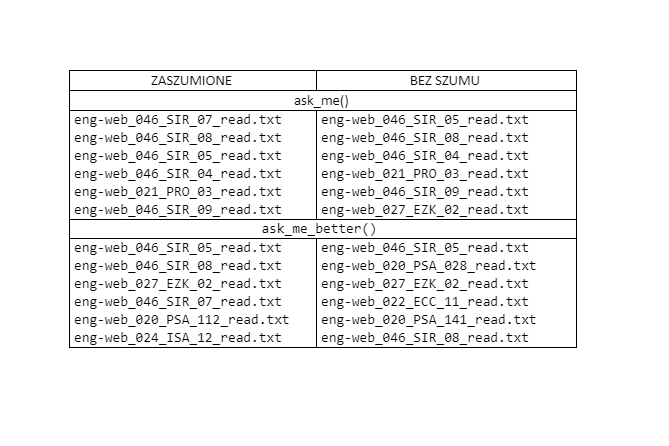

low-rank-approximation wykonano dla k=10000

Dla funkcji ask_me() wykonującej szukanie przed normalizacją wektorów, można zauważyć, że wyniki są bardzo podobne. Jednak w wersji bez szumów 'wyżej' pojawiają się rozdziały zawierające całą sentencję.

Dla funkcji ask_me_better() wykonującej szukanie po normalizacji, w wersji z szumami 4 początkowe dokumenty wydają się być znalezione odpowiednio, natomiast następne dwa mają mniej szukanych słów, niż inne w zbiorze dokumentów.
W wersji odszumionej pojawiają się dokumenty zawirające dużą ilość szukanych słów, ale również takie, w których tych słów jest niewiele. Być może jest to spowodowane nieodpowiednią wartością k w low-rank-approximation.

###### Dla jakiej wartosci k wyniki wyszukiwania sa najlepsze (subiektywnie).

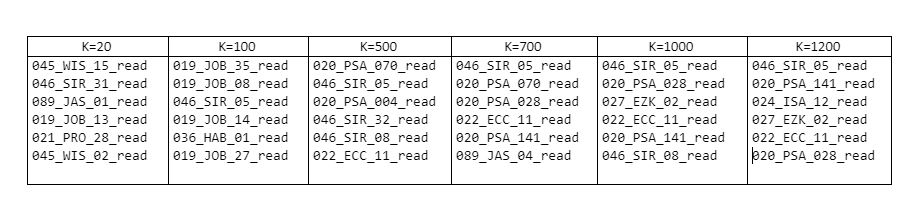


Przyglądając się zestawieniu plików wynikowych dla różnych wartości k, można zauważyć, że im większa jest wartość k (im bliższa liczbie dokumentów) tym bardziej dokładne są dane.
Dla k=20 oraz k=100 pojawiają się w większości dokumenty zawierające niewielką ilość poszukiwanych słów. Dla większych wartości k stopniowo pojawia się więcej dokumentów, w których możemy znaleźć większą ilość poszukiwanych przez nas słów. Dokumenty dla k=700 są w dużej mierze podobne do tych dla k=1200, a dokumenty dla k=1000 i k=1200 są prawie takie same, jedynie w różnej kolejności.

Wydaje mi się, że najlepsze wyniki dla szukanje frazy uzyskałam dla k=1000. Można zatem powiedzieć, że im większa wartość k, tym wyniki są lepsze. 

######  Zbadaj wpływ przekształcenia IDF na wyniki wyszukiwania.


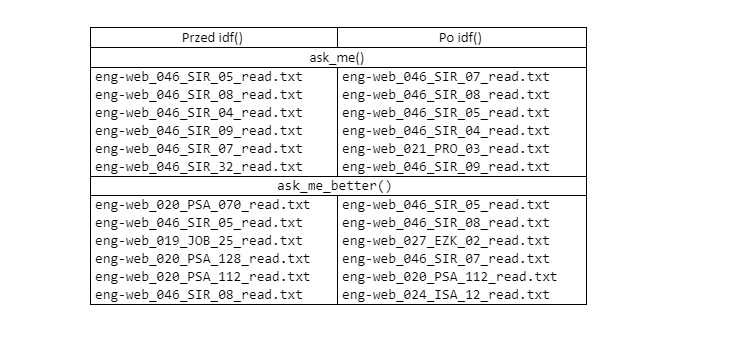

Dla funkcji ask_me(), która nie normalizuje wektora, wyniki po wykonaniu idf() są lepsze - dokumenty zawierają więcej wystąpień danych słów - niż dla tej samej funkcji, przed wykonaniem idf(). Jednak nie ma dużej różnicy między wypisanymi dokumentami.

Dla funkcji ask_me_better(), która normalizuje wektor, wyniki po wykonaniu idf(), są zdecydowanie lepsze niż przed nim. Jednak pojawiają się również nazwy dokumentów, w których nie występuje duża ilość szukanych słów.

Na podstawie tego przykładu można stwierdzić, że przekształcenie IDF pozwala uzyskać lepsze i dokładniejsze wyniki wyszukiwania. 